In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


ARPU: 23.85 USD
Середня кількість платежів на користувача: 2.39
Retention 30+: 10.79%


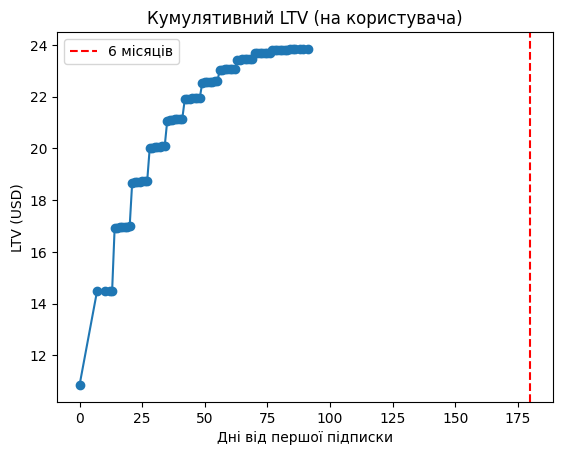

Прогнозований LTV на 180 днів: 26.10 USD на користувача


In [2]:
#  data loading
df = pd.read_csv("Product_analyst.csv")

# filtering for only the desired subscription
df = df[df['product_id'] == 'tenwords_1w_9.99_offer']

#  reject refunds
df = df[df['refunded'] != True]

# Converting the date
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df = df.sort_values('purchase_date')

#  Add the revenue_usd column For subscription tenwords_1w_9.99_offer cost = 9.99 USD
df['revenue_usd'] = 9.99

users = df['user_id'].nunique()

# revenue by user
user_revenue = df.groupby('user_id')['revenue_usd'].sum()

ARPU = user_revenue.mean()  # average revenue per user
Frequency = df.groupby('user_id')['purchase_date'].count().mean()
Retention = (df.groupby('user_id')['purchase_date']
               .apply(lambda x: (x.max() - x.min()).days >= 30).mean())  # retention 30+ днів

print(f"ARPU: {ARPU:.2f} USD")
print(f"Середня кількість платежів на користувача: {Frequency:.2f}")
print(f"Retention 30+: {Retention:.2%}")

#  Cumulative LTV by day
df['days_since_first'] = df.groupby('user_id')['purchase_date'].transform(lambda x: (x - x.min()).dt.days)
ltv_curve = df.groupby('days_since_first')['revenue_usd'].sum().cumsum() / users

plt.plot(ltv_curve.index, ltv_curve.values, marker='o')
plt.axvline(180, color='r', linestyle='--', label="6 місяців")
plt.title("Кумулятивний LTV (на користувача)")
plt.xlabel("Дні від першої підписки")
plt.ylabel("LTV (USD)")
plt.legend()
plt.show()

# Simple extrapolation to 180 days
recent = ltv_curve.tail(30)
coef = np.polyfit(recent.index, recent.values, 1)  # linear trend
poly = np.poly1d(coef)

ltv_180 = poly(180)
print(f"Прогнозований LTV на 180 днів: {ltv_180:.2f} USD на користувача")


In [ ]:
"" Використаний кумулятивний LTV - сума доходів від користувача від початку його життя до моменту 𝑡
(середні доходи на користувача з часом)допоможе рахувати кумулятивний LTV по тижнях до 6 міс,
дивитися динаміку кривої та прогнозувати майбутній LTV за трендом"""